<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/90%20%D1%82%D1%80%D0%B5%D0%BD%20%D0%B8%D1%80%D1%83%D0%B5%D0%BC_of_%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_3_%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание изображений из набора данных CIFAR-10 с помощью свёрточный нейронных сетей



#Подготовка данных
Подключение библиотек

In [0]:
from keras.datasets import cifar10 #Загружаем базу cifar10
from keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточный сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений

Загрузка данных

In [0]:
#Загружаем все базы
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

#задаём заранее batch_size для сетей
batch_size = 128
#Загружаем названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

#Превращаем выходы сетей в формат  one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_train100 = utils.to_categorical(y_train100, 100)


Отображение картинки на выбор

кот


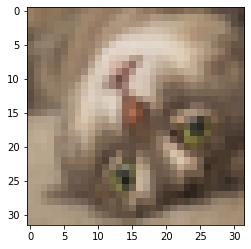

In [21]:
#Выводим для примера картинку
n = 2011
#Загружаем картинку из массива и отрисовываем в цветном формате - RGBA
print(classes[np.argmax(y_train10[n])])
plt.imshow(Image.fromarray(x_train10[n]).convert('RGBA'))
plt.show()

In [22]:
#Выводим пример картинки в цифрах, как она хранится в памяти
print(x_train10[n, 0, 0])

[152 126  99]


In [23]:
print(x_train10.shape)
print(x_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#Нейронные сети
Базовая архитектура свёрточной сети для работы с набором MNIST

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 - 128s - loss: 1.7720 - acc: 0.3343 - val_loss: 1.9542 - val_acc: 0.3877
Epoch 2/20
40000/40000 - 128s - loss: 1.3027 - acc: 0.5258 - val_loss: 2.1566 - val_acc: 0.4242
Epoch 3/20
40000/40000 - 127s - loss: 1.0787 - acc: 0.6176 - val_loss: 0.9604 - val_acc: 0.6613
Epoch 4/20
40000/40000 - 127s - loss: 0.9161 - acc: 0.6783 - val_loss: 0.9563 - val_acc: 0.6742
Epoch 5/20
40000/40000 - 127s - loss: 0.7986 - acc: 0.7239 - val_loss: 0.8808 - val_acc: 0.6990
Epoch 6/20
40000/40000 - 126s - loss: 0.7097 - acc: 0.7576 - val_loss: 0.7294 - val_acc: 0.7484
Epoch 7/20
40000/40000 - 126s - loss: 0.6286 - acc: 0.7887 - val_loss: 0.6645 - val_acc: 0.7741
Epoch 8/20
40000/40000 - 126s - loss: 0.5586 - acc: 0.8116 - val_loss: 0.6405 - val_acc: 0.7887
Epoch 9/20
40000/40000 - 125s - loss: 0.5084 - acc: 0.8291 - val_loss: 0.5805 - val_acc: 0.8091
Epoch 10/20
40000/40000 - 126s - loss: 0.4554 - acc: 0.8464 - val_loss: 0.5963 - val_a

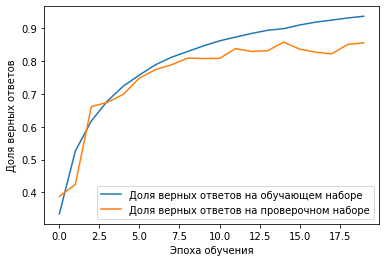

In [24]:
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#промежуточный сверточный слой
model.add(Conv2D( 512, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# второй промежуточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# второй промежуточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# второй промежуточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=2)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание случайной картинки из тестового набора

In [0]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

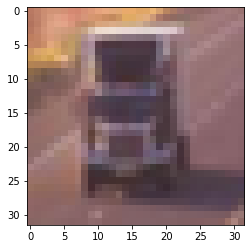

Выход сети:  [1.2751598e-02 5.7523367e-03 4.5353998e-03 2.4511163e-01 1.4565428e-04
 5.8854315e-03 5.6513494e-05 5.8947587e-03 1.9660741e-02 7.0020586e-01]
Распознанный образ:  9
Верный ответ:  [9]
Распознанный браз на картинке:  грузовик


In [0]:
#Выбираем номер пример
n = 2027

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

#Распознаем дополнительные картинки

In [0]:
#Загружаем свою картинку
files.upload()
#Проверяем, что картинка загрузилась
!ls

Saving friends.jpg to friends.jpg
airplane_12.jpg  airplane_1.jpg  friends.jpg  sample_data


In [0]:
#Вводим адрес картинки
img_path = 'friends.jpg'
#Загружаем картинку в массив
img = image.load_img(img_path, target_size=(32, 32))
#Отрисовываем картинку
plt.imshow(img)
plt.show()

In [0]:
#переводим картинку в массив
x = image.img_to_array(img)
#Добавляем одну размерность для предсказания
x = np.expand_dims(x, axis=0)
#Распознаём класс картинки
prediction = model.predict(x)
prediction = np.argmax(prediction)
#Вводим результаты на экран
print("Распознанный образ: ", prediction)
print("Название распознанного образа: ", classes[prediction])